In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
app = pd.read_csv('application_data.csv')
prev = pd.read_csv('previous_application.csv')

### Application Data

In [6]:
app.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
app.shape

(307511, 122)

In [8]:
ab = app.isnull().sum()*100/app.shape[0]  #Finding out null values
ab = ab[ab<=40]
ab = pd.DataFrame(ab)
ab.index 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [10]:
app1 = app.loc[:,['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [10]:
app1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Previous Application

In [13]:
prev.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [14]:
prev.shape

(1670214, 37)

In [15]:
ab = prev.isnull().sum()*100/prev.shape[0]  #Finding out null values
ab = ab[ab<=40]
ab = pd.DataFrame(ab)
ab.index 

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [16]:
pre1 = prev.loc[:,['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']]

In [17]:
pre1.shape

(1670214, 26)

In [18]:
pre1.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high


### EDA (Exploratory Data Analysis)

### Univariate

#### Distribution of loan defaults

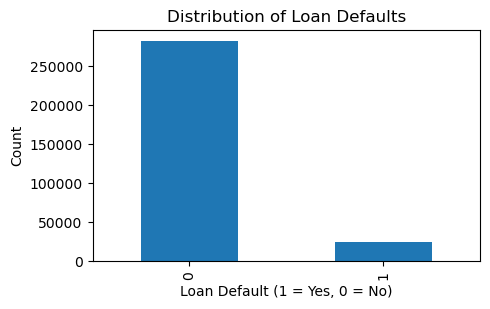

In [42]:
plt.figure(figsize = (5,3))
app1['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Defaults')
plt.xlabel('Loan Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [23]:
app1['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

#### Gender Distribution

In [81]:
app1['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

###  Car Ownership Status

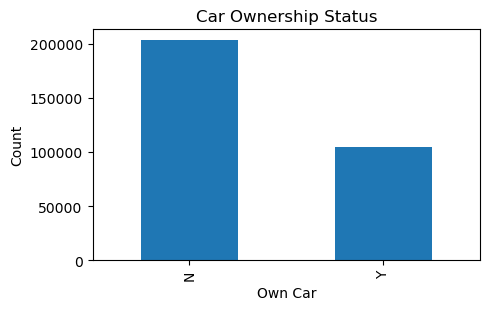

In [44]:
plt.figure(figsize = (5,3))
app1['FLAG_OWN_CAR'].value_counts().plot(kind='bar')
plt.title('Car Ownership Status')
plt.xlabel('Own Car')
plt.ylabel('Count')
plt.show()

In [46]:
app1['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

#### Realty Ownership Status

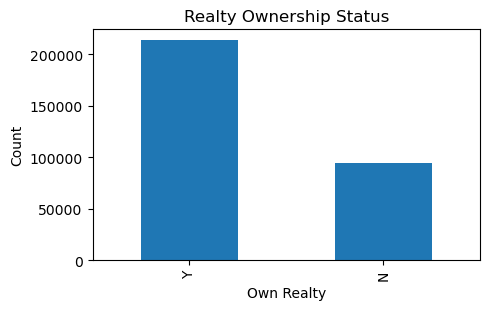

In [50]:
plt.figure(figsize = (5,3))
app1['FLAG_OWN_REALTY'].value_counts().plot(kind='bar')
plt.title('Realty Ownership Status')
plt.xlabel('Own Realty')
plt.ylabel('Count')
plt.show()

In [48]:
app1['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

#### Number of Children Distribution

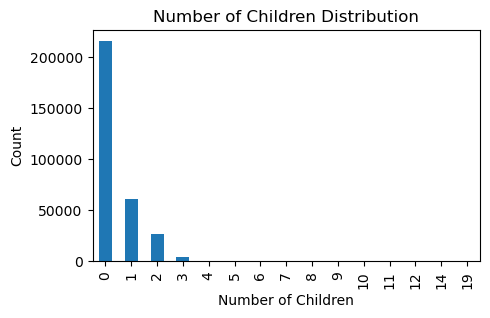

In [52]:
plt.figure(figsize = (5,3))
app1['CNT_CHILDREN'].value_counts().sort_index().plot(kind='bar') 
plt.title('Number of Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

In [54]:
app1['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

#### Average Credit Amount by Gender

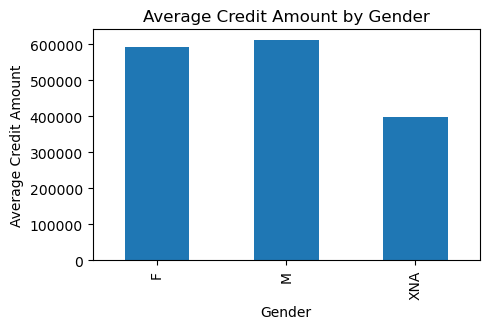

In [58]:
plt.figure(figsize = (5,3))
app1.groupby('CODE_GENDER')['AMT_CREDIT'].mean().plot(kind='bar')
plt.title('Average Credit Amount by Gender') 
plt.xlabel('Gender') 
plt.ylabel('Average Credit Amount') 
plt.show()

In [56]:
app1.groupby('CODE_GENDER')['AMT_CREDIT'].mean()

CODE_GENDER
F      592766.717305
M      611095.197084
XNA    399375.000000
Name: AMT_CREDIT, dtype: float64

### Distribution of Loan Types

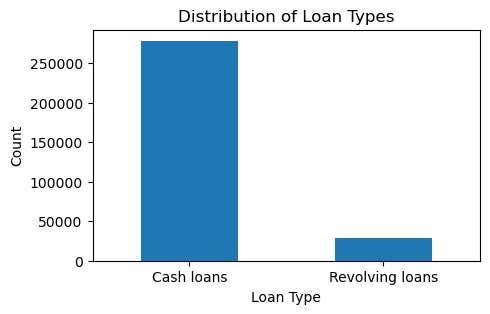

In [72]:
plt.figure(figsize = (5,3))
app1['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.xticks(rotation = 360)
plt.ylabel('Count')
plt.show()

In [62]:
app1['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

#### Employment Status Based on Days Employed

In [76]:
app1['Employment_Status'] = app1['DAYS_EMPLOYED'].apply(lambda x: 'Employed' if x < 0 else 'Unemployed')

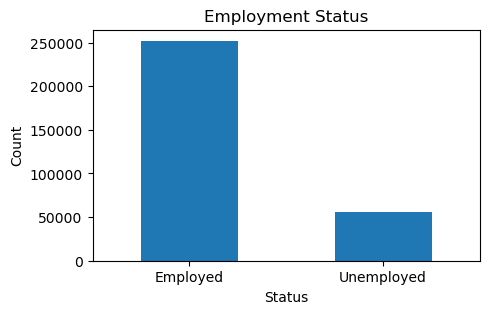

In [82]:
plt.figure(figsize = (5,3))
app1['Employment_Status'].value_counts().plot(kind='bar') 
plt.title('Employment Status') 
plt.xlabel('Status') 
plt.xticks(rotation = 360)
plt.ylabel('Count') 
plt.show()

In [80]:
app1['Employment_Status'].value_counts()

Employment_Status
Employed      252135
Unemployed     55376
Name: count, dtype: int64

#### Average Annuity Amount

In [161]:
app1['AMT_ANNUITY'].mean()

27108.573909183444

#### Average Age of Clients

In [180]:
abs(app['DAYS_BIRTH'].mean()/365)

43.93697278587161

#### Distribution of Document Submissions

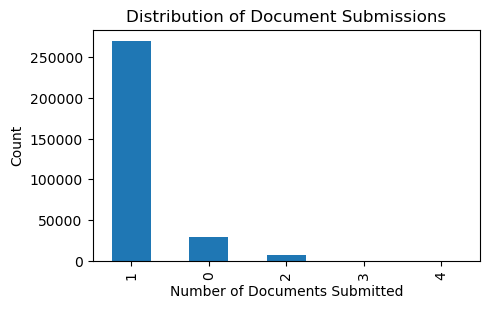

In [84]:
plt.figure(figsize = (5,3))
app1[[f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]].sum(axis=1).value_counts().plot(kind='bar')
plt.title('Distribution of Document Submissions')
plt.xlabel('Number of Documents Submitted')
plt.ylabel('Count')
plt.show()

In [86]:
app1[[f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]].sum(axis=1).value_counts()

1    270056
0     29549
2      7742
3       163
4         1
Name: count, dtype: int64

#### Distribution of Income Types

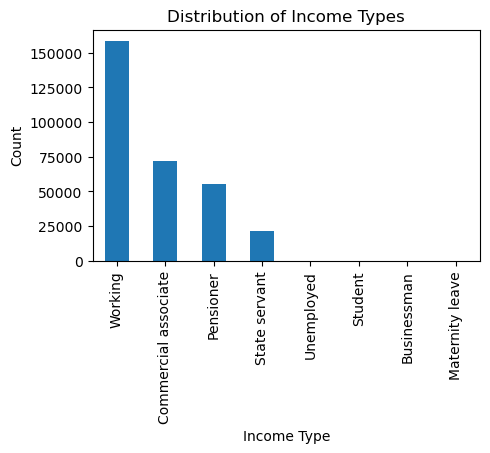

In [212]:
plt.figure(figsize = (5,3))
app1['NAME_INCOME_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Income Types')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.show()

In [88]:
app1['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

#### Distribution of Family Status

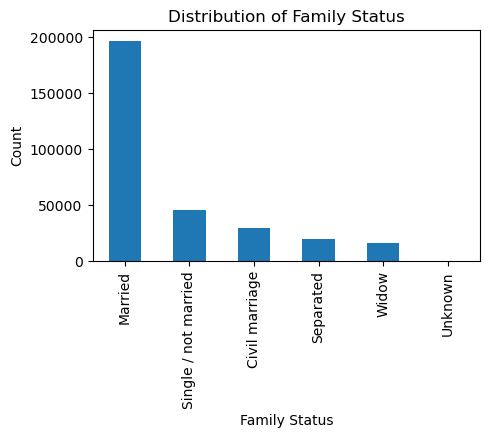

In [219]:
plt.figure(figsize = (5,3))
app1['NAME_FAMILY_STATUS'].value_counts().plot(kind='bar')
plt.title('Distribution of Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()

In [90]:
app1['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

#### Average Loan Amount by Family Status

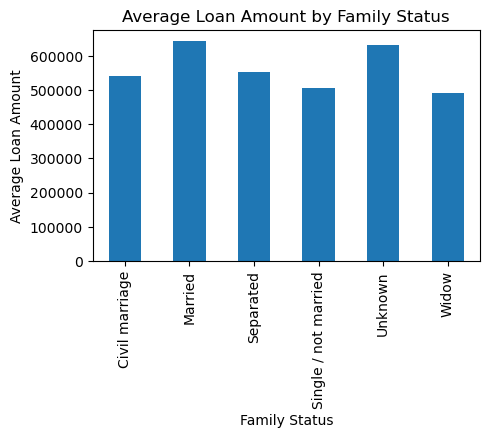

In [226]:
plt.figure(figsize = (5,3))
app1.groupby('NAME_FAMILY_STATUS')['AMT_CREDIT'].mean().plot(kind='bar') 
plt.title('Average Loan Amount by Family Status') 
plt.xlabel('Family Status') 
plt.ylabel('Average Loan Amount') 
plt.show()

In [92]:
app1.groupby('NAME_FAMILY_STATUS')['AMT_CREDIT'].mean()

NAME_FAMILY_STATUS
Civil marriage          541573.459647
Married                 642999.790770
Separated               552113.820410
Single / not married    505350.178835
Unknown                 630000.000000
Widow                   490695.908596
Name: AMT_CREDIT, dtype: float64

#### Distribution of Housing Type

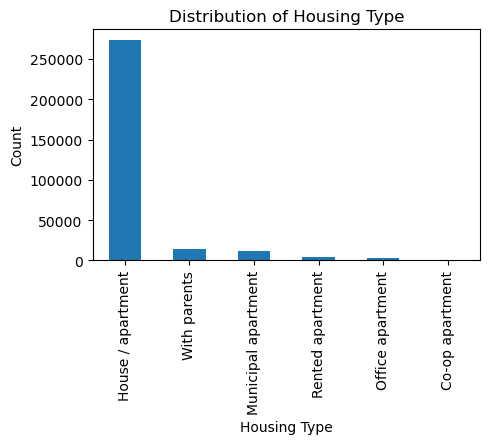

In [257]:
plt.figure(figsize = (5,3))
app1['NAME_HOUSING_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.show()

In [94]:
app1['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

#### Credit Amount Distribution

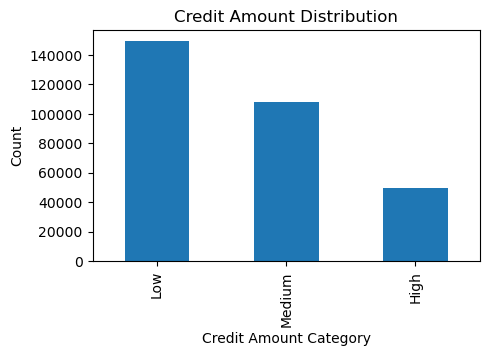

In [259]:
plt.figure(figsize = (5,3))
pd.cut(app1['AMT_CREDIT'], bins=[0, 500000, 1000000,4050000], labels=['Low', 'Medium', 'High']).value_counts().plot(kind='bar') 
plt.title('Credit Amount Distribution') 
plt.xlabel('Credit Amount Category') 
plt.ylabel('Count') 
plt.show()

In [96]:
pd.cut(app1['AMT_CREDIT'], bins=[0, 500000, 1000000,4050000], labels=['Low', 'Medium', 'High']).value_counts()

AMT_CREDIT
Low       149333
Medium    108193
High       49985
Name: count, dtype: int64

### Bivariate

#### Gender vs Loan Default

In [138]:
data = app1.groupby('CODE_GENDER')['TARGET'].value_counts().unstack()

<Figure size 500x300 with 0 Axes>

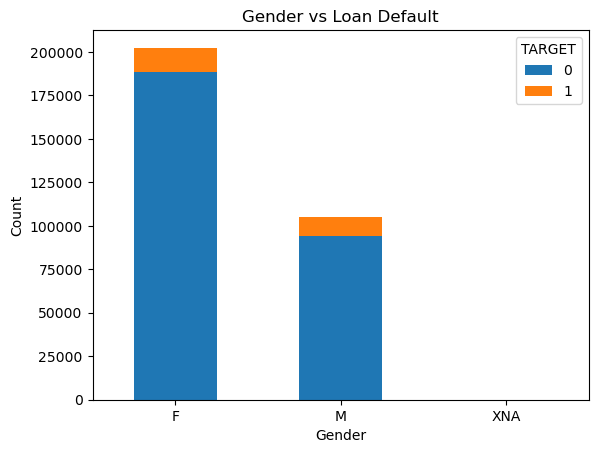

In [140]:
plt.figure(figsize = (5,3))
data.plot(kind='bar', stacked=True)
plt.title('Gender vs Loan Default')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Car Ownership vs. Loan Default

In [130]:
data = app1.groupby('FLAG_OWN_CAR')['TARGET'].value_counts().unstack()

<Figure size 500x300 with 0 Axes>

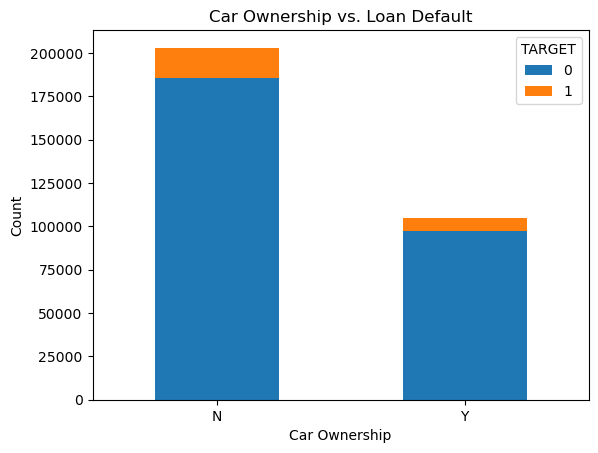

In [136]:
plt.figure(figsize = (5,3))
data.plot(kind='bar', stacked=True)
plt.title('Car Ownership vs. Loan Default')
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Realty Ownership vs. Loan Default

In [128]:
data = app1.groupby('FLAG_OWN_REALTY')['TARGET'].value_counts().unstack()
data

TARGET,0,1
FLAG_OWN_REALTY,,
N,86357,7842
Y,196329,16983


<Figure size 500x300 with 0 Axes>

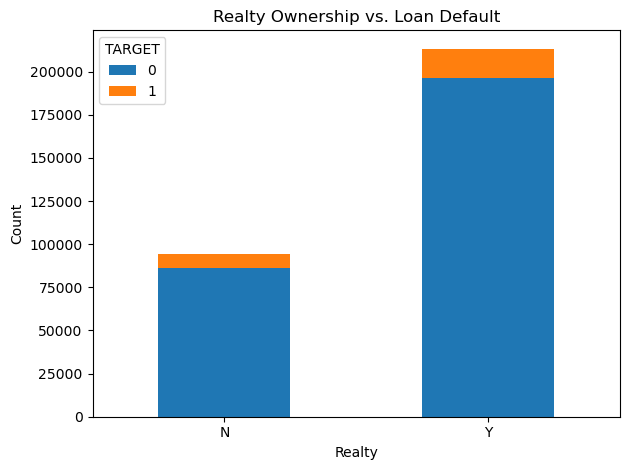

In [126]:
plt.figure(figsize = (5,3))
data.plot(kind='bar', stacked=True)
plt.title('Realty Ownership vs. Loan Default')
plt.xlabel('Realty')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

#### Number of Children vs. Loan Default

In [120]:
data = app1.groupby('CNT_CHILDREN')['TARGET'].value_counts().unstack()
data

TARGET,0,1
CNT_CHILDREN,,
0,198762.0,16609.0
1,55665.0,5454.0
2,24416.0,2333.0
3,3359.0,358.0
4,374.0,55.0
5,77.0,7.0
6,15.0,6.0
7,7.0,NaN
8,2.0,NaN


<Figure size 500x300 with 0 Axes>

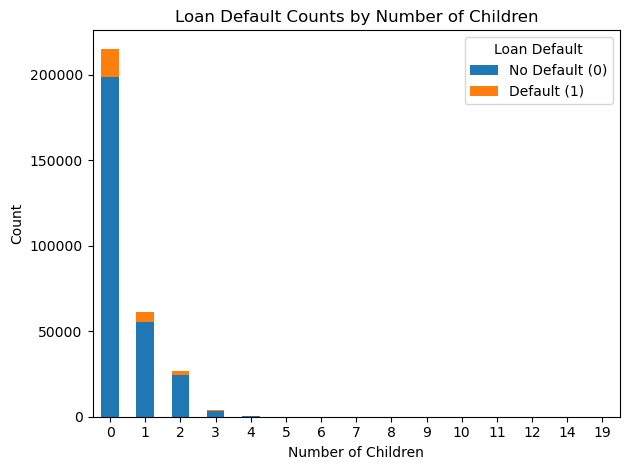

In [118]:
plt.figure(figsize = (5,3))
data.plot(kind='bar', stacked=True)
plt.title('Loan Default Counts by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Default', labels=['No Default (0)', 'Default (1)'])
plt.tight_layout()

#### Employment Days vs. Loan Default

In [142]:
abs(app1.groupby('TARGET')['DAYS_EMPLOYED'].describe()).reset_index()

,TARGET,count,mean,std,min,25%,50%,75%,max
0,0,282686.0,65696.146123,142877.810161,17912.0,2813.0,1235.0,278.0,365243.0
1,1,24825.0,42394.675448,119484.634253,16069.0,2156.0,1034.0,379.0,365243.0


#### Income vs. Loan Default

In [144]:
app1.groupby('TARGET')['AMT_INCOME_TOTAL'].describe().reset_index()

,TARGET,count,mean,std,min,25%,50%,75%,max
0,0,282686.0,169077.722266,110476.268524,25650.0,112500.0,148500.0,202500.0,18000090.0
1,1,24825.0,165611.760906,746676.959440,25650.0,112500.0,135000.0,202500.0,117000000.0


#### Credit Amount vs. Loan Default

In [146]:
app1.groupby('TARGET')['AMT_CREDIT'].describe().reset_index()

,TARGET,count,mean,std,min,25%,50%,75%,max
0,0,282686.0,602648.282002,406845.907710,45000.0,270000.0,517788.0,810000.0,4050000.0
1,1,24825.0,557778.527674,346433.235646,45000.0,284400.0,497520.0,733315.5,4027680.0


#### Family Status vs. Loan Default

In [148]:
data = app1.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts().unstack()

<Figure size 500x300 with 0 Axes>

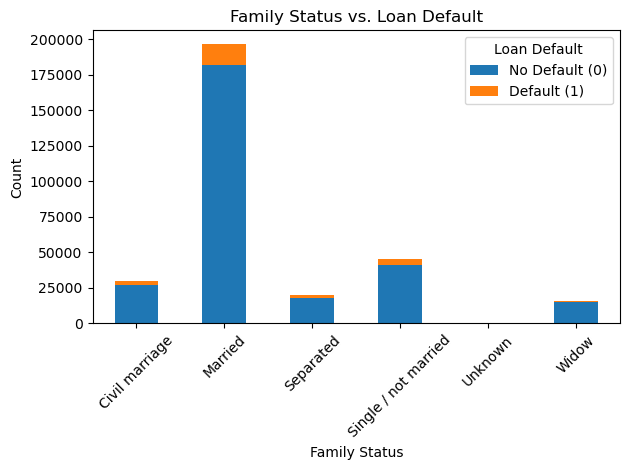

In [154]:
plt.figure(figsize = (5,3))
data.plot(kind='bar', stacked=True)
plt.title('Family Status vs. Loan Default')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Default', labels=['No Default (0)', 'Default (1)'])
plt.tight_layout()

#### Income Type vs. Loan Default

In [158]:
data = app1.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts().unstack()

<Figure size 500x300 with 0 Axes>

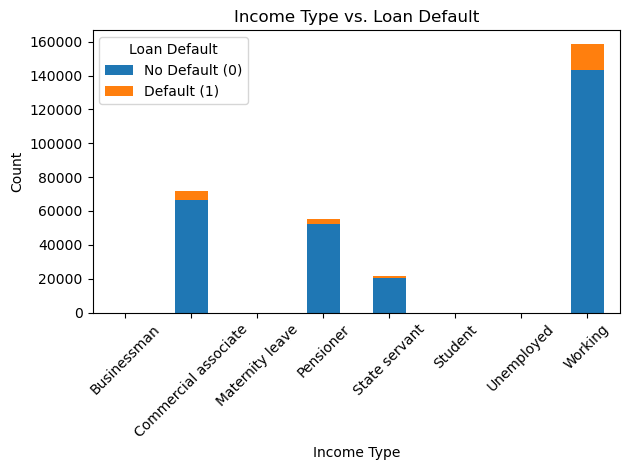

In [160]:
plt.figure(figsize = (5,3))
data.plot(kind='bar', stacked=True)
plt.title('Income Type vs. Loan Default')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Default', labels=['No Default (0)', 'Default (1)'])
plt.tight_layout()

#### Housing Type vs. Loan Default

In [162]:
data = app1.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts().unstack()

<Figure size 500x300 with 0 Axes>

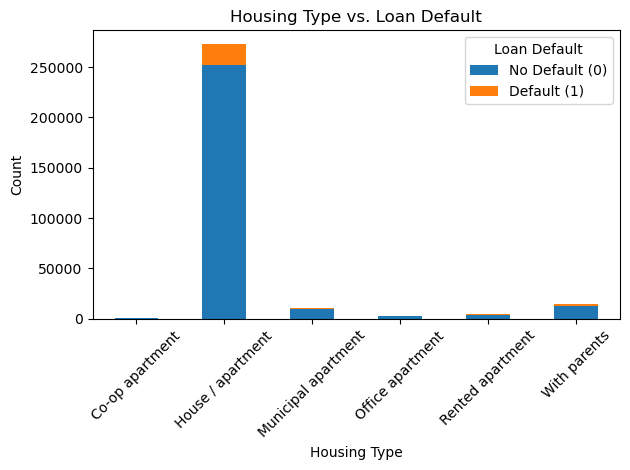

In [164]:
plt.figure(figsize = (5,3))
data.plot(kind='bar', stacked=True)
plt.title('Housing Type vs. Loan Default')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Default', labels=['No Default (0)', 'Default (1)'])
plt.tight_layout()

### Multivariate

#### Gender, Car Ownership, and Loan Default

In [228]:
data = app1.groupby(['CODE_GENDER', 'FLAG_OWN_CAR'])['TARGET'].value_counts().reset_index()
pivot_table = data.pivot_table(values='count', index=['CODE_GENDER', 'FLAG_OWN_CAR'], columns='TARGET')
pivot_table

TARGET                           0        1
CODE_GENDER FLAG_OWN_CAR                   
F           N             145922.0  11567.0
            Y              42356.0   2603.0
M           N              39751.0   5682.0
            Y              54653.0   4973.0
XNA         N                  2.0      NaN
            Y                  2.0      NaN

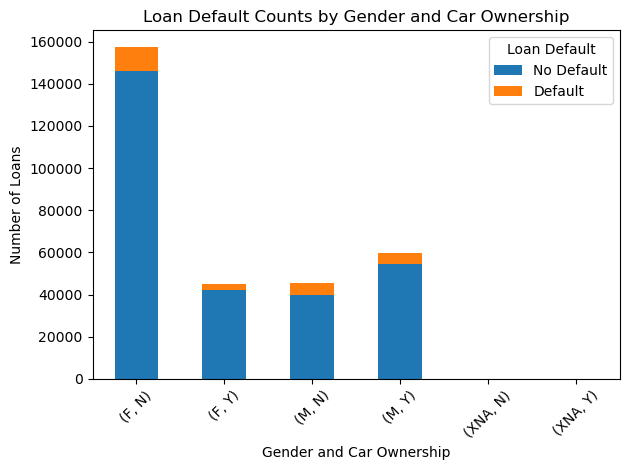

In [226]:
pivot_table.plot(kind='bar', stacked=True)
plt.title('Loan Default Counts by Gender and Car Ownership')
plt.xlabel('Gender and Car Ownership')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Default', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

#### Income Type, Family Status, and Loan Default

<Figure size 1000x2000 with 0 Axes>

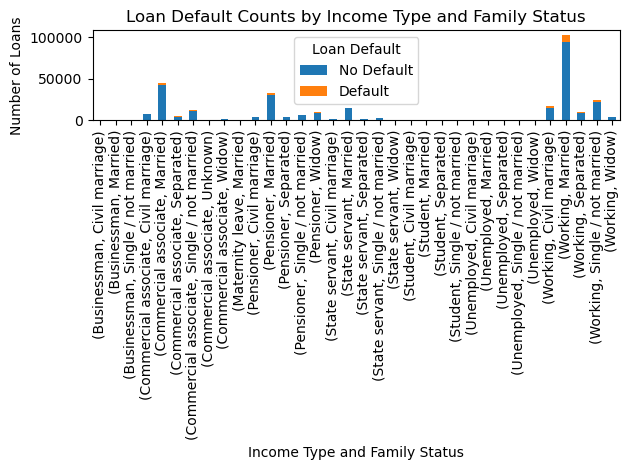

In [244]:
data = app1.groupby(['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS'])['TARGET'].value_counts().reset_index()
pivot_table = data.pivot_table(values='count', index=['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS'], columns='TARGET', fill_value=0)

# Plotting
plt.figure(figsize = (10,20))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Loan Default Counts by Income Type and Family Status')
plt.xlabel('Income Type and Family Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)
plt.legend(title='Loan Default', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

In [232]:
pivot_table

TARGET                                           0       1
NAME_INCOME_TYPE     NAME_FAMILY_STATUS                   
Businessman          Civil marriage            1.0     0.0
                     Married                   7.0     0.0
                     Single / not married      2.0     0.0
Commercial associate Civil marriage         7035.0   682.0
                     Married               42341.0  3148.0
                     Separated              4204.0   333.0
                     Single / not married  11130.0  1107.0
                     Unknown                   2.0     0.0
                     Widow                  1545.0    90.0
Maternity leave      Married                   3.0     2.0
Pensioner            Civil marriage         3350.0   227.0
                     Married               30856.0  1655.0
                     Separated              3543.0   228.0
                     Single / not married   5787.0   337.0
                     Widow                  8844.0   535.0
State servant        Civil marriage         1614.0   133.0
                     Married               14294.0   818.0
                     Separated              1287.0    74.0
                     Single / not married   2596.0   189.0
                     Widow                   663.0    35.0
Student              Civil marriage            4.0     0.0
                     Married                   9.0     0.0
                     Separated                 1.0     0.0
                     Single / not married      4.0     0.0
Unemployed           Civil marriage            3.0     0.0
                     Married                   4.0     6.0
                     Separated                 1.0     0.0
                     Single / not married      4.0     1.0
                     Widow                     2.0     1.0
Working              Civil marriage        14807.0  1919.0
                     Married               94068.0  9221.0
                     Separated              9114.0   985.0
                     Single / not married  21464.0  2823.0
                     Widow                  4097.0   276.0

#### Employment Status, Car Ownership, and Loan Default

In [248]:
data = app1.groupby(['Employment_Status', 'FLAG_OWN_CAR'])['TARGET'].size().reset_index(name='count')
data

,Employment_Status,FLAG_OWN_CAR,count
0,Employed,N,157717
1,Employed,Y,94418
2,Unemployed,N,45207
3,Unemployed,Y,10169


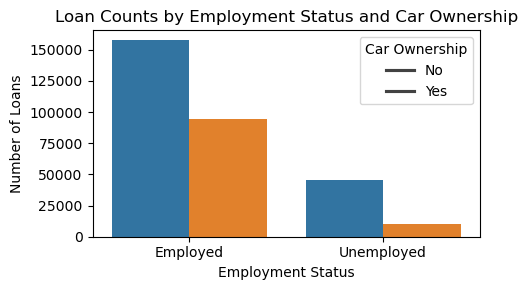

In [254]:
plt.figure(figsize=(5,3))
sns.barplot(x='Employment_Status', y='count', hue='FLAG_OWN_CAR', data=data)
plt.title('Loan Counts by Employment Status and Car Ownership')
plt.xlabel('Employment Status')
plt.ylabel('Number of Loans')
plt.legend(title='Car Ownership', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

#### Age, Income, and Loan Default

In [12]:
app1['Age'] = app1['DAYS_BIRTH'].apply(lambda x: int(abs(x/365)))

In [14]:
data = app1.groupby('Age')[['TARGET','AMT_INCOME_TOTAL']].agg({'TARGET':'count','AMT_INCOME_TOTAL':'mean'}).reset_index()
data

,Age,TARGET,AMT_INCOME_TOTAL
0,20,1,112500.000000
1,21,1254,121359.297847
2,22,2933,141711.539959
3,23,4057,147089.549261
4,24,3905,153958.662830
5,25,4168,158820.581574
6,26,4561,161557.228711
7,27,8476,162751.191732
8,28,7975,166868.852727
9,29,7670,169642.471365


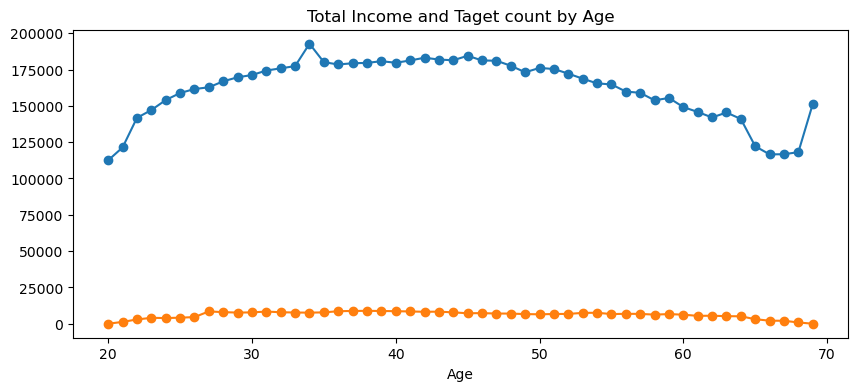

In [37]:
plt.figure(figsize=(10,4))
plt.plot(data['Age'], data['AMT_INCOME_TOTAL'], marker='o')
plt.plot(data['Age'], data['TARGET'], marker='o')
plt.title('Total Income and Taget count by Age')
plt.xlabel('Age')
plt.show()

#### Family Status, Number of Children, and Loan Default

In [69]:
data = app1.groupby(['NAME_FAMILY_STATUS', 'CNT_CHILDREN'])['TARGET'].value_counts().reset_index()
pivot_data = data.pivot_table(index=['NAME_FAMILY_STATUS', 'CNT_CHILDREN'], columns='TARGET', values='count', fill_value=0)
pivot_data = pivot_data.reset_index()
d1 = pivot_data[pivot_data['NAME_FAMILY_STATUS'] == 'Civil marriage']
d2 = pivot_data[pivot_data['NAME_FAMILY_STATUS'] == 'Separated']
d3 = pivot_data[pivot_data['NAME_FAMILY_STATUS'] == 'Single / not married']
d4 = pivot_data[pivot_data['NAME_FAMILY_STATUS'] == 'Widow']

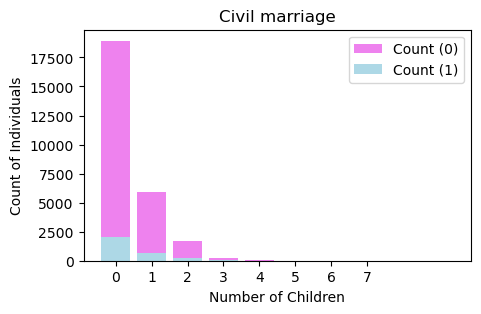

In [100]:
plt.figure(figsize=(5,3))
plt.bar(d1['CNT_CHILDREN'],d1[0], label='Count (0)',color = 'violet')
plt.bar(d1['CNT_CHILDREN'],d1[1], label='Count (1)',color='lightblue')
plt.xlabel('Number of Children')
plt.ylabel('Count of Individuals')
plt.title('Civil marriage')
plt.xticks(d4['CNT_CHILDREN'])
plt.legend()
plt.show()

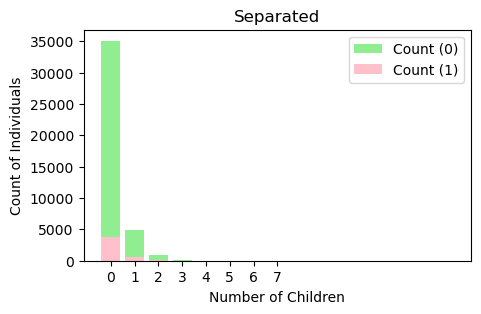

In [102]:
plt.figure(figsize=(5,3))
plt.bar(d2['CNT_CHILDREN'],d3[0], label='Count (0)',color='lightgreen')
plt.bar(d2['CNT_CHILDREN'],d3[1], label='Count (1)',color='pink')
plt.xlabel('Number of Children')
plt.ylabel('Count of Individuals')
plt.title('Separated')
plt.xticks(d4['CNT_CHILDREN'])
plt.legend()
plt.show()

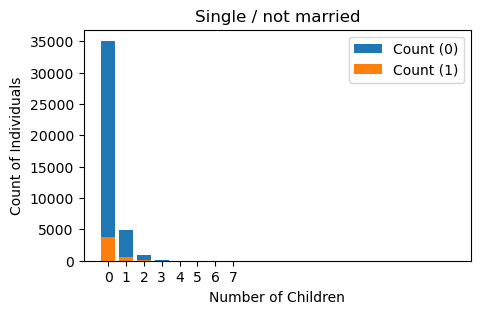

In [104]:
plt.figure(figsize=(5,3))
plt.bar(d3['CNT_CHILDREN'],d3[0], label='Count (0)')
plt.bar(d3['CNT_CHILDREN'],d3[1], label='Count (1)')
plt.xlabel('Number of Children')
plt.ylabel('Count of Individuals')
plt.title('Single / not married')
plt.xticks(d4['CNT_CHILDREN'])
plt.legend()
plt.show()

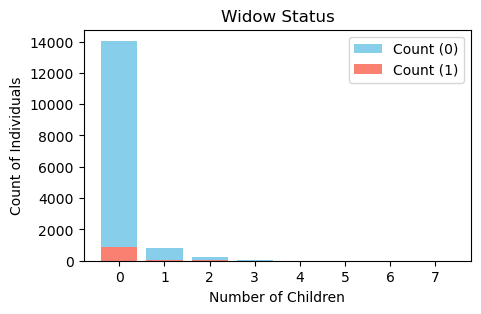

In [106]:
plt.figure(figsize=(5,3))
plt.bar(d4['CNT_CHILDREN'],d4[0], label='Count (0)', color='skyblue')
plt.bar(d4['CNT_CHILDREN'],d4[1], label='Count (1)', color='salmon')
plt.xlabel('Number of Children')
plt.ylabel('Count of Individuals')
plt.title('Widow Status')
plt.xticks(d4['CNT_CHILDREN'])
plt.legend()
plt.show()

#### Housing Type, Realty Ownership, and Loan Default

In [346]:
data = app1.groupby(['NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY'])['TARGET'].value_counts().reset_index()
pivot_df = data.pivot_table(values='count', index=['NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY'], columns='TARGET', fill_value=0)
pivot_df

TARGET                                      0        1
NAME_HOUSING_TYPE   FLAG_OWN_REALTY                   
Co-op apartment     N                   389.0     35.0
                    Y                   644.0     54.0
House / apartment   N                 67984.0   5687.0
                    Y                183612.0  15585.0
Municipal apartment N                  6206.0    616.0
                    Y                  4022.0    339.0
Office apartment    N                  1148.0     76.0
                    Y                  1297.0     96.0
Rented apartment    N                  2435.0    360.0
                    Y                  1845.0    241.0
With parents        N                  8195.0   1068.0
                    Y                  4909.0    668.0

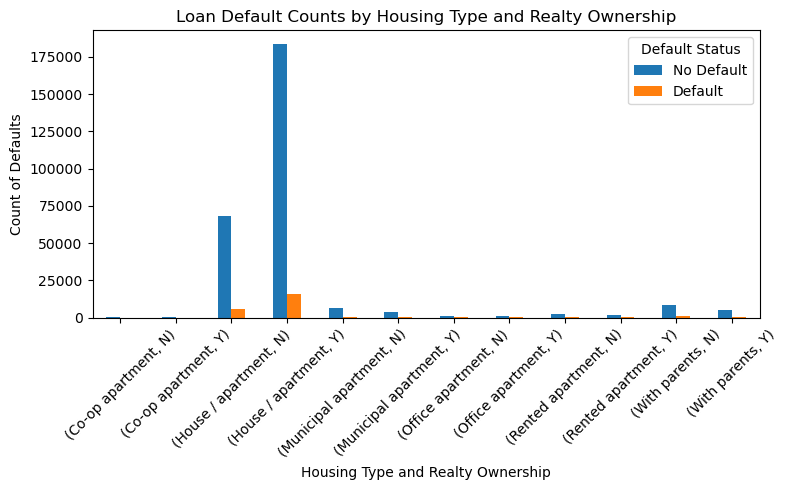

In [348]:
pivot_df.plot(kind='bar', stacked=False, figsize=(8,5))

plt.title('Loan Default Counts by Housing Type and Realty Ownership')
plt.xlabel('Housing Type and Realty Ownership')
plt.ylabel('Count of Defaults')
plt.xticks(rotation=45)
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

#### NAME_TYPE_SUITE, Income Type, and Loan Default

In [350]:
data = app1.groupby(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE'])['TARGET'].value_counts().reset_index()
pivot_data = data.pivot_table(values='count', index='NAME_TYPE_SUITE', columns='NAME_INCOME_TYPE', fill_value=0)
pivot_data

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
NAME_TYPE_SUITE,,,,,,,,
Children,0.0,294.5,0.0,508.5,117.5,0.0,0.0,713.0
Family,1.0,4385.0,0.0,4245.5,1444.0,1.0,0.0,9999.0
Group of people,0.0,37.0,0.0,27.5,9.5,0.0,0.0,61.5
Other_A,0.0,105.0,0.0,52.0,25.0,1.0,0.0,250.5
Other_B,0.0,204.0,0.0,148.5,57.0,1.0,0.0,475.0
"Spouse, partner",0.0,1260.5,1.0,853.5,407.0,0.0,0.0,3163.0
Unaccompanied,9.0,29342.5,1.5,21746.5,8746.0,14.0,11.0,64404.0


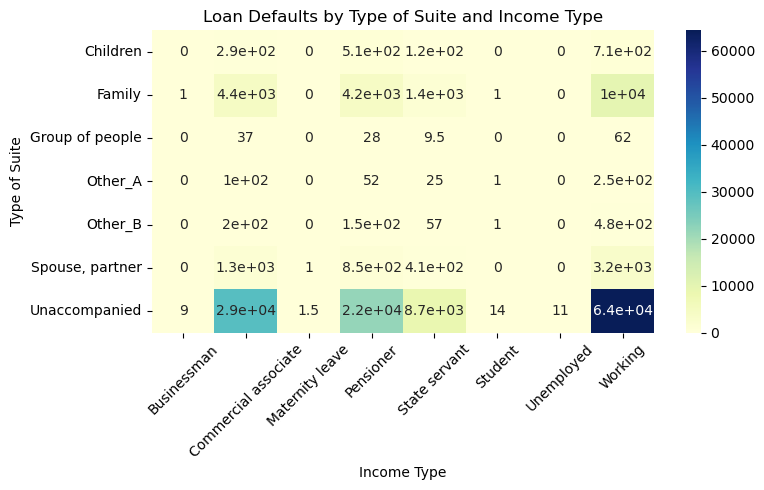

In [360]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_data, annot=True,cmap='YlGnBu')
plt.title('Loan Defaults by Type of Suite and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Type of Suite')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Region Rating, Housing Type, and Loan Default

In [362]:
df = app1.groupby(['REGION_RATING_CLIENT', 'NAME_HOUSING_TYPE'])['TARGET'].value_counts().reset_index()
pivot_data = df.pivot_table(values='count', index='REGION_RATING_CLIENT', columns='NAME_HOUSING_TYPE', fill_value=0)
pivot_data

NAME_HOUSING_TYPE,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
REGION_RATING_CLIENT,,,,,,
1,64.5,13662.5,1619.0,129.5,153.5,469.5
2,428.5,101506.0,3198.5,948.5,1810.5,5600.0
3,68.0,21265.5,774.0,230.5,476.5,1350.5


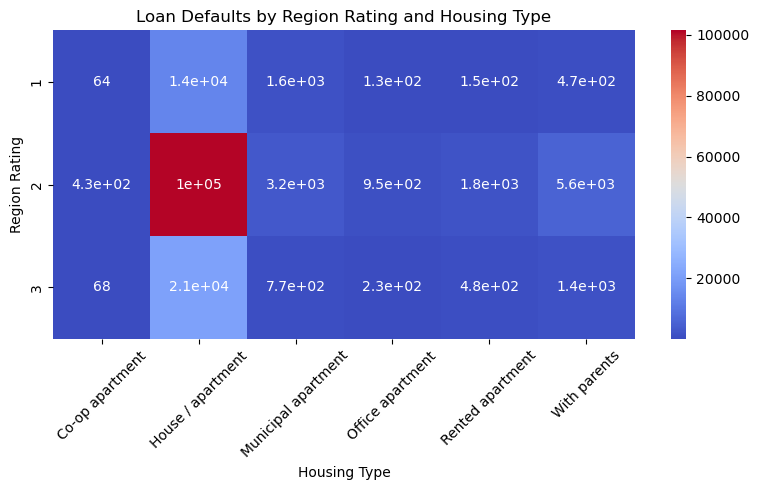

In [364]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_data, annot=True,cmap='coolwarm')
plt.title('Loan Defaults by Region Rating and Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Region Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Document Count and Loan Default

In [88]:
df = app1.groupby(['CNT_FAM_MEMBERS', 'TARGET'])['FLAG_DOCUMENT_2'].value_counts().reset_index()
df

,CNT_FAM_MEMBERS,TARGET,FLAG_DOCUMENT_2,count
0,1.0,0,0,62171
1,1.0,0,1,1
2,1.0,1,0,5673
3,1.0,1,1,2
4,2.0,0,0,146343
5,2.0,0,1,5
6,2.0,1,0,12007
7,2.0,1,1,2
8,3.0,0,0,47993
9,3.0,1,0,4608
